In [1]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import time
from mpl_toolkits import mplot3d

## ODE Solver Tests

## Lorenz Attractor/Systems of ODES

In [292]:
def lorenz_scipy(r,t):
    sigma=10;beta=8/3;rho=28
    x,y,z=r
    return sigma*(y-x),x*(rho-z)-y,x*y - beta*z

def lorenz(t,r):
    sigma=10;beta=8/3;rho=28
    x,y,z=r.T
    return np.block([[sigma*((y)-(x))],[(x)*(rho-z)-(y)],[(x)*(y) - beta*(z)]]).T

In [314]:
n=1000
f=np.zeros((n,3))
t=0
dt=0.02
f[0,:] = 1.0
for i in range(n-1):
    f[i+1,:] = f[i,:] + dt*lorenz(t,f[i,:])

In [315]:
n=4000
t=0
dt=0.01
f=np.zeros((n,3))
f[0,:] = 1.0
for i in range(n-1):
    f1=dt*lorenz(t,f[i,:])
    f2=dt*lorenz(t+(dt/2),f[i,:]+(f1/2))
    f3=dt*lorenz(t+(dt/2),f[i,:]+(f2/2))
    f4=dt*lorenz(t+dt,f[i,:]+f3)
    f[i+1,:]=f[i,:]+(f1/6)+(f2/3)+(f3/3)+(f4/6)
    t+=dt
# np.savetxt("../lorenz.dat",f)

In [1065]:
rt=rkf45(lorenz,np.ones(3),0,40,4000)
norm(rs-rt)

757.3867179010547

In [1066]:
t=np.arange(0,40,0.01)
rs=odeint(lorenz_scipy,[1,1,1],np.arange(0,40,0.01))
rs.shape

(4000, 3)

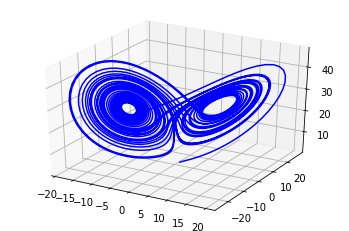

In [1067]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot(rs[:,0], rs[:,1], rs[:,2],c='r')
ax.plot(rt[:,0], rt[:,1], rt[:,2],c='b')
plt.show()

In [1068]:
# x1,y1,z1=np.loadtxt("../lorenz.dat").T

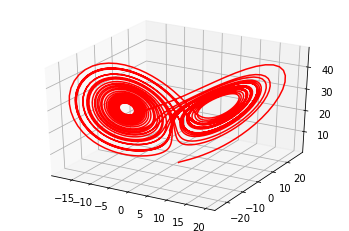

In [1069]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(rs[:,0], rs[:,1], rs[:,2],c='r')
# ax.plot(f[:,0], f[:,1], f[:,2],c='b')
# ax.plot(x1, y1, z1,c='c')
plt.show()

## ODE Test Problem
### Test Problem
$$y' + 2y = 2 - {{\bf{e}}^{ - 4t}}\hspace{0.25in}y\left( 0 \right) = 1$$
### Exact Solution
$$y\left( t \right) = 1 + \frac{1}{2}{{\bf{e}}^{ - 4t}} - \frac{1}{2}{{\bf{e}}^{ - 2t}}$$

In [3]:
def func(t,y):
    return 2.0-np.exp(-4*t)-2*y
def exact(t):
    return 1.0+0.5*np.exp(-4*t)-0.5*np.exp(-2*t)

### Solver Convergence and Timing

Relative L2 Error =  0.011393448514644033 8.315774295274754e-05 1.0055437836013675e-07 4.101378365793521e-06 1.6927598135017275e-09
Relative L2 Error =  0.009370703152550047 5.488754029544991e-05 4.644184199458768e-08 1.934193775334577e-06 6.486016357194693e-10
Relative L2 Error =  0.007958152930260741 3.888896039023783e-05 2.4312196917772585e-08 1.0268508542743685e-06 2.9010965725492657e-10
Relative L2 Error =  0.006915798226891554 2.8975554132368205e-05 1.3929661548709451e-08 5.942711265030828e-07 1.4509464899187006e-10
Relative L2 Error =  0.006114938186167494 2.2415252078914357e-05 8.543819528559647e-09 3.672517357257171e-07 7.895992707221408e-11
Relative L2 Error =  0.005480345124958531 1.7851890502822092e-05 5.527141798469135e-09 2.389725985769707e-07 4.590434150733051e-11
Relative L2 Error =  0.004965102247081181 1.455094454114952e-05 3.731946175553548e-09 1.6210836853119132e-07 2.814326796919454e-11
Relative L2 Error =  0.0045384292586949666 1.2086726869927193e-05 2.60992840416

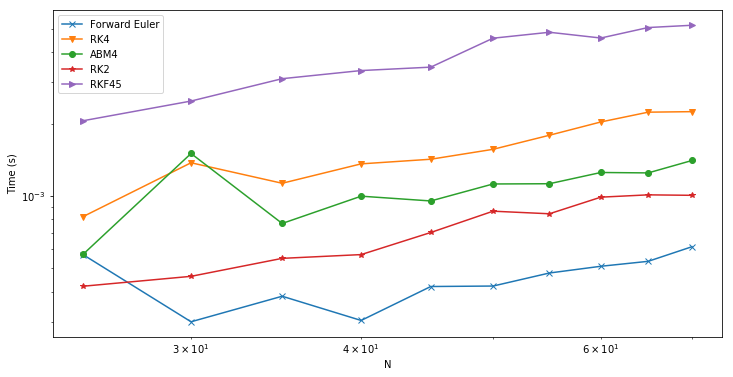

In [27]:
errs=[];ts=[]
a=0;b=1;ic=np.ones(1)
ns=[5*i for i in range(5,15)]
for n in ns:
    t1=time.time()
    yt0=forward_euler(func,ic,a,b,n)
    t2=time.time()
#     print(t2-t1)
    ts.append(t2-t1)
    
    t1=time.time()
    yt1=rk2(func,ic,a,b,n)
    t2=time.time()
#     print(t2-t1)
    ts.append(t2-t1)
    
    t1=time.time()
    yt2=rk4(func,ic,a,b,n)
    t2=time.time()
    ts.append(t2-t1)
    
    t1=time.time()
    yt3=abm4(func,ic,a,b,n)
    t2=time.time()
#     print(t2-t1)
    ts.append(t2-t1)
    
    t1=time.time()
    yt4=rkf45(func,ic,a,b,n)
    t2=time.time()
    ts.append(t2-t1)
    
    tt=np.linspace(a,b,n)
    errs.append([relerr(yt0[:,0],exact(tt)),\
                 relerr(yt1[:,0],exact(tt)),\
                 relerr(yt2[:,0],exact(tt)),\
                relerr(yt3[:,0],exact(tt)),\
                relerr(yt4[:,0],exact(tt))])
    print("Relative L2 Error = ",relerr(yt0[:,0],exact(tt)),\
          relerr(yt1[:,0],exact(tt)),\
          relerr(yt2[:,0],exact(tt)),\
         relerr(yt3[:,0],exact(tt)),\
         relerr(yt4[:,0],exact(tt)))
    
    
errs=np.array(errs)
ts=np.array(ts).reshape(errs.shape)
plt.figure(figsize=(12,6))
plt.loglog(ns,ts[:,0],'x-',label='Forward Euler')
plt.loglog(ns,ts[:,-3],'v-',label='RK4')
plt.loglog(ns,ts[:,-2],'o-',label='ABM4')
plt.loglog(ns,ts[:,1],'*-',label='RK2')
plt.loglog(ns,ts[:,-1],'>-',label='RKF45')
plt.ylabel('Time (s)')
plt.xlabel('N')
plt.legend()

### Numerical Solution Comparison

Text(0, 0.5, 'y(x)')

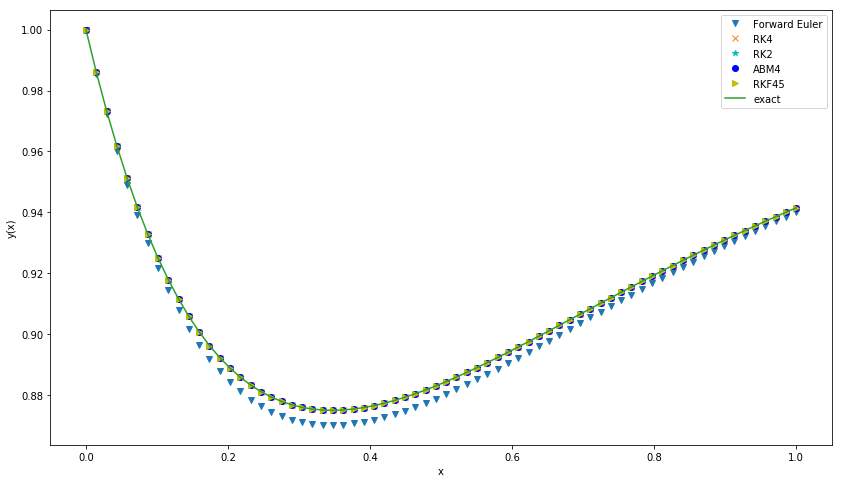

In [28]:
plt.figure(figsize=(14,8))
plt.plot(tt,yt0,'v',label='Forward Euler')
plt.plot(tt,yt1,'x',label='RK4')
plt.plot(tt,yt2,'c*',label='RK2')
plt.plot(tt,yt3,'bo',label='ABM4')
plt.plot(tt,yt4,'y>',label='RKF45')
plt.plot(tt,exact(tt),'-',label='exact')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')

Order of Accuracy
RKF45 5.17640471879887 abm4 4.089271755383102 RK4 4.159754134820392 RK2 2.1901678302977516 Forward Euler 1.0480105502722559
RKF45 5.261565350782244 abm4 4.122565269431236 RK4 4.237007696479851 RK2 2.278682558842317 Forward Euler 1.0720090676306495
RKF45 5.219307087855357 abm4 4.1076295677238726 RK4 4.198636461030184 RK2 2.2353190700698837 Forward Euler 1.059944773429418
RKF45 5.188837510162018 abm4 4.095788314822693 RK4 4.170986712005191 RK2 2.2036608502751966 Forward Euler 1.0513522975069836
RKF45 5.165818712580789 abm4 4.086226111814987 RK4 4.150108110190471 RK2 2.17952346511825 Forward Euler 1.044919001721117
RKF45 5.1478560950880885 abm4 4.07836506479864 RK4 4.1337813180349805 RK2 2.160507747853374 Forward Euler 1.0399207128215042
RKF45 5.133255674766519 abm4 4.071798444915024 RK4 4.120661281457523 RK2 2.1451381702514722 Forward Euler 1.0359248857807168
RKF45 5.121404379860664 abm4 4.066235929539189 RK4 4.109888651776294 RK2 2.1324568951387017 Forward Euler 1.0326

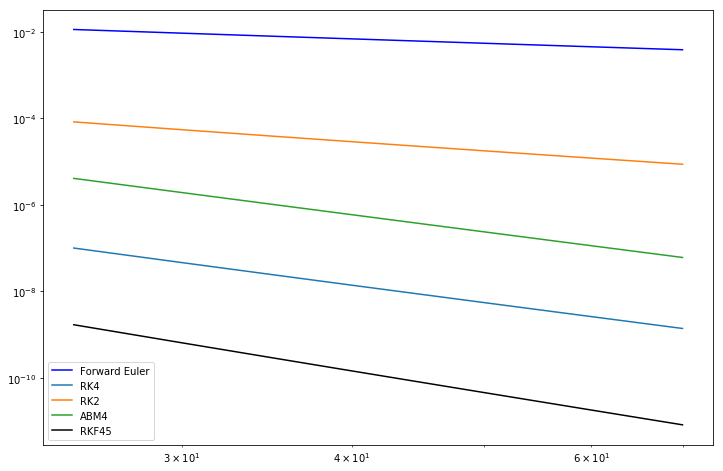

In [34]:
plt.figure(figsize=(12,8))
plt.loglog(ns,errs[:,0],'b',label='Forward Euler')
plt.loglog(ns,errs[:,-3],label='RK4')
plt.loglog(ns,errs[:,1],label='RK2')
plt.loglog(ns,errs[:,-2],label='ABM4')
plt.loglog(ns,errs[:,-1],'k',label='RKF45')
plt.legend()
ps=[]
for j in range(len(errs[0,:])):
#     print(j)
    etmp=errs[:,j]
#     print(etmp)
    for i in range(len(ns)):
        p=-np.log(etmp[i-1]/etmp[i])/np.log(ns[i-1]/ns[i])
        ps.append(p)
ps = np.array(ps).reshape(errs.T.shape)


ords=zip(ps[0,:].tolist(),\
    ps[1,:].tolist(),\
    ps[2,:].tolist(),\
    ps[3,:].tolist(),\
        ps[4,:].tolist())
print("Order of Accuracy")
for ofe,ork2,ork4,oabm4,orkf in ords:
    print("RKF45",orkf,"abm4",oabm4,"RK4",ork4,"RK2",ork2,"Forward Euler",ofe)

## Projectile Motion 2nd ODE (In progress)

In [434]:
# def force(t,v):
# #     b=1;m=1
#     return np.block([[0],\
#                      [-9.8]])
# def velocity(t,v):
#     th=np.pi/4
#     return np.block([[v*np.cos(th)],\
#                      [-9.8*t - v*np.sin(th)]])

# # def vexact(t,x):
# #     b=3;m=1
# #     return (9.8/b) * (np.exp(b*t/m) -1)

In [456]:
# th=np.pi/4;ic=np.array([[2*np.cos(th),2*np.sin(th)]]).flatten()
# ic=[0,0]
# v=forward_euler(force,ic,0,10,1000)
# # s=rk4(velocity,v[:,0],0,10,1000)
# tt=np.linspace(0,1,1000)
# plt.plot(tt,v)

## Member Functions

### Helper Functions

In [8]:
def relerr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))/np.linalg.norm((uexact))

def abserr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))

def cond(A):
    return np.linalg.cond(A)

def norm(M):
    return np.linalg.norm(M,2)

def inv(A):
    return np.linalg.inv(A)

## ${\displaystyle f_u^{n+4}={\tfrac {48}{25}}f_u^{n+3}-{\tfrac {36}{25}}f_u^{n+2}+{\tfrac {16}{25}}f_u^{n+1}-{\tfrac {3}{25}}f_u^{n}+{\tfrac {12}{25}}\Delta t f_u^{n+4}}$
## ${\displaystyle f_u^{n+4} - {\tfrac {12}{25}}\Delta t f_u^{n+4}}={\tfrac {48}{25}}f_u^{n+3}-{\tfrac {36}{25}}f_u^{n+2}+{\tfrac {16}{25}}f_u^{n+1}-{\tfrac {3}{25}}f_u^{n}$

In [2]:
def func(t,y):
    return 2.0-np.exp(-4*t)-2*y
def exact(t):
    return 1.0+0.5*np.exp(-4*t)-0.5*np.exp(-2*t)

In [22]:
# BDF4 Method
def bdf4(f,ic,a,b,n):
    dt = b/(n-1)
    u = np.zeros(n)
    t = np.linspace(a,b,n)
    u[0] = ic
    for i in range(4):
        u1=dt*f(t[i],u[i])
        u2=dt*f(t[i]+(dt/2),u[i]+(u1/2))
        u3=dt*f(t[i]+(dt/2),u[i]+(u2/2))
        u4=dt*f(t[i+1],u[i]+u3)
        u[i+1]=u[i]+((u1/6)+(u2/3)+(u3/3)+(u4/6))
    
    us = np.zeros(n)
    for i in range(4):
        us[i] = f(t[i],u[i])
    print(us)
    for i in range(3,n-1):
        us[i] = f(t[i],u[i])
        
        u[i+1] = (dt/25)*(12*f(t[i],u[i]) + (48)*us[i-3] - (36)*us[i-2] +\
                                (16)*us[i-1] - (3)*us[i])
# #         us[i] = f(t[i],u[i])
    return u

In [23]:
n=50;finaltime =  1.0
ic=np.ones(1)

In [24]:
ut = bdf4(func,ic,a,b,n)

[-1.         -0.88321546 -0.77712119 -0.68081778  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


In [19]:
t = np.linspace(a,b,n)

In [20]:
ut

array([ 1.        ,  0.9808025 ,  0.96387769,  0.94901669, -0.02838003,
       -0.01085145,  0.01696696, -0.03825491,  0.04123216,  0.04340496,
        0.03737944,  0.047801  ,  0.0429851 ,  0.04344007,  0.04573222,
        0.04558988,  0.04686061,  0.04779663,  0.04834682,  0.0491237 ,
        0.04972021,  0.05026472,  0.05081009,  0.05128403,  0.05172917,
        0.052143  ,  0.05251903,  0.0528683 ,  0.05318985,  0.05348554,
        0.05375864,  0.05401011,  0.05424184,  0.0544555 ,  0.05465235,
        0.05483379,  0.05500101,  0.05515511,  0.05529713,  0.05542803,
        0.05554866,  0.05565983,  0.05576229,  0.05585672,  0.05594375,
        0.05602395,  0.05609787,  0.05616599,  0.05622877,  0.05628664])

Text(0, 0.5, 'y(t)')

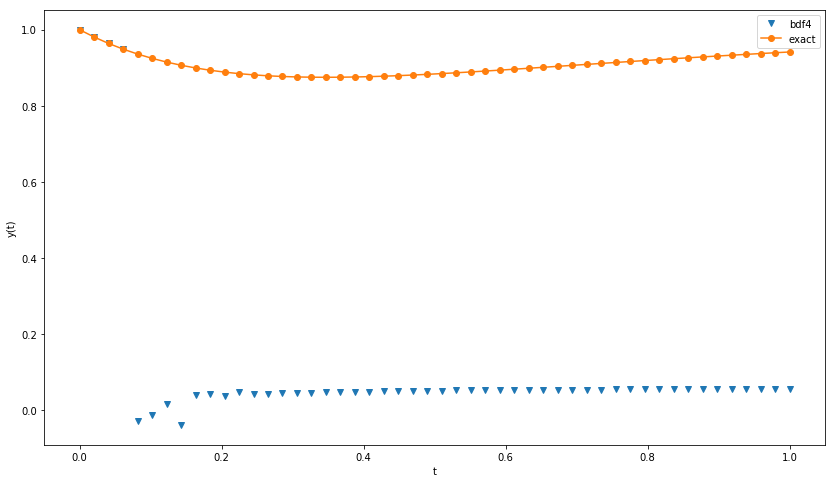

In [21]:
plt.figure(figsize=(14,8))
plt.plot(t,ut,'v',label='bdf4')
plt.plot(t,exact(t),'o-',label='exact')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')

In [212]:
def rk2(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (tf-ti)/(n-1)
    unknowns = len(initial_condition)
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition
     
    for i in range(n-1):
        u1=k*f(t[i],u[i,:])
        u2=k*f(t[i]+k,u[i,:]+u1)
        u[i+1,:]=u[i,:]+(u1+u2)/2
    return u

def rk4(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (tf-ti)/(n-1)
    unknowns = len(initial_condition)
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition

    for i in range(n-1):
        u1=k*f(t[i],u[i,:])
        u2=k*f(t[i]+(k/2),u[i,:]+(u1/2))
        u3=k*f(t[i]+(k/2),u[i,:]+(u2/2))
        u4=k*f(t[i]+k,u[i,:]+u3)
        u[i+1,:]=u[i,:]+((u1/6)+(u2/3)+(u3/3)+(u4/6))
    return u

def rkf45(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (tf-ti)/(n-1)
    unknowns = len(initial_condition)
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition

    for i in range(n-1):
        u1=k*f(t[i],u[i,:])
        u2=k*f(t[i]+(k/4),u[i,:]+(u1/4))
        u3=k*f(t[i]+(3*k/8),u[i,:]+(3*u1/32)+(9*u2/32))
        u4=k*f(t[i]+(12*k/13),u[i,:]+(1932*u1/2197)-(7200*u2/2197)+(7296*u3/2197))
        u5=k*f(t[i]+k,u[i,:]+(439*u1/216)-(8*u2)+(3680*u3/513)-(845*u4/4104))
        u6=k*f(t[i]+0.5*k,u[i,:]-(8*u1/27)+2*u2-(3544*u3/2565)+(1859*u4/4104)-(11*u5/40))
        u[i+1,:]=u[i,:]+16*(u1/135)+(6656*u3/12825)+(28561*u4/56430)-(9*u5/50)+(2*u6/55)
    return u

def forward_euler(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (tf-ti)/(n-1)
    unknowns = len(initial_condition)
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition
    
    for i in range(n-1):
        u[i+1,:]=u[i,:]+k*f(t[i],u[i,:])
        
    return u

def abm4(f,initial_condition,ti,tf,n):
    unknowns = len(initial_condition)
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition
    t=np.linspace(a,b,n)
    
    #Apply a solver for first 3 timesteps
    k = (tf-ti)/(n-1)
    k24 = (k/24.0)
    s1 = np.zeros(n)
    for i in range(3):
        u1=k*f(t[i],u[i,:])
        u2=k*f(t[i]+(k/2),u[i,:]+(u1/2))
        u3=k*f(t[i]+(k/2),u[i,:]+(u2/2))
        u4=k*f(t[i+1],u[i,:]+u3)
        u[i+1,:] = u[i,:]+ ((u1/6)+(u2/3)+(u3/3)+(u4/6))

    for i in range(3):
        s1[i] = f(t[i],u[i,:])
    for i in range(3,n-1):
        s1[i] = f(t[i],u[i,:])
        ustar = u[i,:] + k24 * ( 55*s1[i] - 59*s1[i-1] + 37*s1[i-2] - 9*s1[i-3] )
        u[i+1,:] = u[i,:] + k24 * ( 9*f(t[i+1],ustar)  + 19*s1[i] - 5*s1[i-1] + s1[i-2] )
    return u

## adams moulton

${\displaystyle {\begin{aligned}y_{n+2}&=y_{n+1}+h\left({\frac {5}{12}}f(t_{n+2},y_{n+2})+{\frac {2}{3}}f(t_{n+1},y_{n+1})-{\frac {1}{12}}f(t_{n},y_{n})\right),\\y_{n+3}&=y_{n+2}+h\left({\frac {9}{24}}f(t_{n+3},y_{n+3})+{\frac {19}{24}}f(t_{n+2},y_{n+2})-{\frac {5}{24}}f(t_{n+1},y_{n+1})+{\frac {1}{24}}f(t_{n},y_{n})\right),\\y_{n+4}&=y_{n+3}+h\left({\frac {251}{720}}f(t_{n+4},y_{n+4})+{\frac {646}{720}}f(t_{n+3},y_{n+3})-{\frac {264}{720}}f(t_{n+2},y_{n+2})+{\frac {106}{720}}f(t_{n+1},y_{n+1})-{\frac {19}{720}}f(t_{n},y_{n})\right).\end{aligned}}}"$

In [61]:
def func(t,u):
    return 2.0-np.exp(-4*t)-2*u
def exact(t):
    return 1.0+0.5*np.exp(-4*t)-0.5*np.exp(-2*t)

In [62]:
a=0;b=1;ic=np.ones(1);n=50

# def forcing(t, y):
#     return 1 + y/t + (y/t)**2
# def exact(t):
#     return t*np.tan(np.log(t))
# a, b = 1, 3
# n = 25; ic = np.zeros(1) 
yt=abm4(func,ic,a,b,n)
tt=np.linspace(a,b,n)
relerr(yt[:,0],exact(tt))

2.389725985769707e-07

In [68]:
# yt.shape

In [69]:
a=0;b=1;ic=np.ones(1);
ns=[3*i for i in range(5,15)]
errs=[]
for n in ns:
    yt=abm4(func,ic,a,b,n)
    tt=np.linspace(a,b,n)
    errs.append(relerr(yt[:,0],exact(tt)))

Text(0, 0.5, 'y(t)')

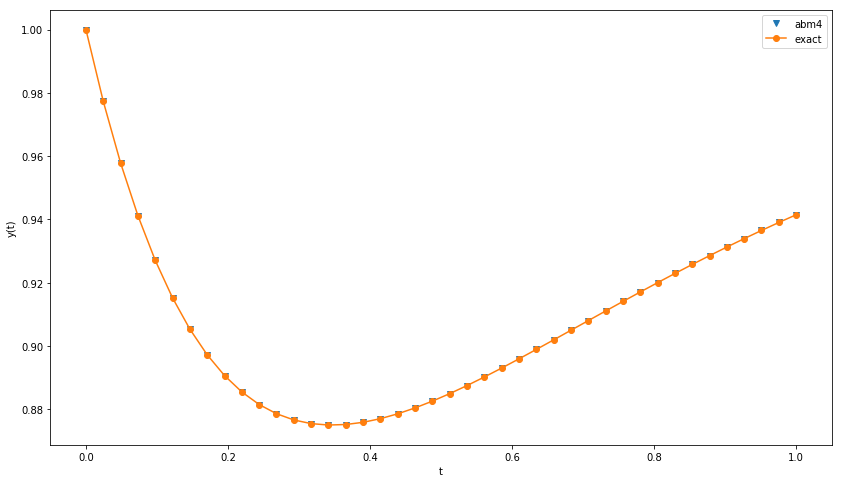

In [70]:
plt.figure(figsize=(14,8))
plt.plot(tt,yt,'v',label='abm4')
plt.plot(tt,exact(tt),'o-',label='exact')
# plt.plot(tt,exact(tt)-yt[:,0],'o-',label='exact')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')

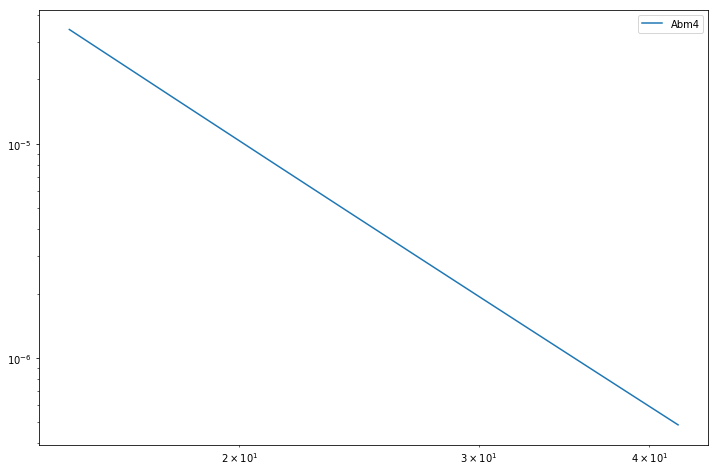

In [65]:
plt.figure(figsize=(12,8))
plt.loglog(ns,errs,label='Abm4')
plt.legend()

In [66]:
ps=[]

for i in range(len(ns)):
    p=-np.log(errs[i-1]/errs[i])/np.log(ns[i-1]/ns[i])
    ps.append(p)
ps

[4.131337458397473,
 4.170005204113535,
 4.154946858012783,
 4.141251980256099,
 4.129323101502499,
 4.119029760873447,
 4.110135120969949,
 4.102408765400456,
 4.095653535280182,
 4.089707601852503]

In [467]:

# def rk4(f, a, b, y0, N):
#     if np.ndim(y0) is 0:
#         ys = np.zeros(N+1)
#     else:
#         ys = np.zeros((N+1,len(y0)))
    
#     k = (b - a)/N
#     ys[0] = y0
#     ts = np.linspace(a,b,N+1)
    
#     for i in range(N):
#         t = ts[i]
#         y1 = ys[i]
#         f1 = f(t,y1)
#         y2 = y1 + k/2*f1
#         f2 = f(t+k/2, y2)
#         y3 = y1 + k/2*f2
#         f3 = f(t+k/2, y3)
#         y4 = y1 + k*f3
#         ys[i+1] = y1 + k/6*( f1 + 2*f2 + 2*f3 + f(t+k, y4) )
    
#     return ts, ys

# def abm4(f, a, b, y0, N):
#     if np.ndim(y0) is 0:
#         ys = np.zeros(N+1)
#     else:
#         ys = np.zeros((N+1,len(y0)))
    
#     k = (b - a)/N
#     ys[0] = y0
#     ts = np.linspace(a,b,N+1)
    
#     temp, ys[:4] = rk4(f, a, a+3*k, y0, 3)
#     fs = np.zeros(ys.shape)
#     fs[0] = f(ts[0], ys[0])
#     fs[1] = f(ts[1], ys[1])
#     fs[2] = f(ts[2], ys[2])
    
#     for i in range(3, N):
#         fs[i] = f(ts[i], ys[i])
#         y_star = ys[i] + k/24*( 55*fs[i] - 59*fs[i-1] + 37*fs[i-2] - 9*fs[i-3] )
#         ys[i+1] = ys[i] + k/24*( 9*f(ts[i+1],y_star) + 19*fs[i] - 5*fs[i-1] + fs[i-2] )
    
#     return ts, ys


# def forcing(t, y):
#     return 1 + y/t + (y/t)**2
# def exact(t):
#     return t*np.tan(np.log(t))
# a, b = 1, 3
# y0 = 0

# '''
# # This problem tests that the code words for vectors
# def forcing(t, y):
#     u, v = y
#     return np.array([v/3, v*(v-1)/(3*u)])
# def exact(t):
#     temp = 3*np.exp(-8/3*t)
#     ret = np.zeros((len(t), 2))
#     ret[:,0] = (1+temp)/8
#     ret[:,1] = -temp
#     return ret
# a, b = 0, 1
# y0 = np.array([.5, -3])
# '''


# Ns = [50*2**i for i in range(8)]

# ks = [(b - a)/N for N in Ns]
# errors_rk4 = []
# errors_abm4 = []

# for N in Ns:
#     ts, ys = rk4(forcing, a, b, y0, N)
#     y_true = exact(ts)
#     print(y_true.shape)
#     error = norm(ys - y_true)/norm(y_true)
#     errors_rk4.append(error)
    
#     ts, ys = abm4(forcing, a, b, y0, N)
#     y_true = exact(ts)
#     error = norm(ys - y_true)/norm(y_true)
#     errors_abm4.append(error)

# from scipy.stats import linregress as linreg

# RK4_order = linreg(np.log(ks[:-1]), np.log(errors_rk4[:-1]))[0]
# ABM4_order = linreg(np.log(ks), np.log(errors_abm4))[0]


# plt.figure(figsize=(12,8))
# #plt.plot(ts, exact(np.array(ts)), 'b-')
# #plt.plot(ts, ys, 'r--')

# plt.loglog(ks, errors_rk4,'b-o', label='RK4')
# plt.loglog(ks[:-1], errors_rk4[:-1],'ro', label=('RK4 - $\mathcal{O}(h^{%.3f})$'%RK4_order))
# plt.loglog(ks, errors_abm4,'g-o', label=('ABM4 - $\mathcal{O}(h^{%.3f})$'%ABM4_order))
# plt.legend()
# plt.xlabel('$k$')
# plt.ylabel('Relative $L^2$ Error')

# plt.title('Fourth order convergence of ABM4 and RK4.')
# plt.show()


In [468]:
# pts = (tmp[tmp.files[0]]).T[:-1]
# n = len(pts[0])

# file = open("tmpfile.bin",'wb')
# cnt = 0
# for i in pts.flatten():
# #     print(i)
#     cnt+=1
# # cnt
#     file.write(struct.pack('d',i))

# tmppt = np.fromfile("mepts/me25.bin",dtype = 'd')
# tmppt = tmppt.reshape(3,len(tmppt)//3)

# %%timeit
# tmppt = np.fromfile("mepts/me10000.bin",dtype = 'd')

# with open("tmpfile.bin","rb") as binfile:
#     data = binfile.readline()
#     tmpdat = struct.unpack('d',binfile.read(8))
# {tmpdat}.format('f')

In [1035]:
ps=[]

for i in range(len(ns)):
    p=-np.log(errs[i-1]/errs[i])/np.log(ns[i-1]/ns[i])
    ps.append(p)
ps

[-0.38528816827456236,
 -0.33810659289648637,
 -0.3591433517370786,
 -0.37606897527634386,
 -0.3897709022395324,
 -0.4009675211822798,
 -0.41022311159059094,
 -0.4179669203614605,
 -0.4245217861428953,
 -0.4301307705649009]